In [ ]:
# Устанавливаем пакет для визуализации нейросетей с использованием TensorFlow и Keras
!pip install tf-keras-vis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Автоматическая перезагрузка модулей при изменениях
%reload_ext autoreload
%autoreload 2

# Импортируем необходимые библиотеки
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

# Определяем количество доступных GPU
_, gpus = num_of_gpus()

# Выводим количество распознанных TensorFlow GPU
print(f'TensorFlow recognized {gpus} GPU(s)')


TensorFlow recognized 1 GPU(s)


In [ ]:
# Загружаем предобученную модель VGG16 из библиотеки Keras
from tensorflow.keras.applications.vgg16 import VGG16 as VGG_Model

# Инициализируем модель VGG16 с весами, обученными на ImageNet, включая верхний классификатор
vgg_model = VGG_Model(weights='imagenet', include_top=True)

# Отображаем подробную информацию о структуре нейросети
vgg_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

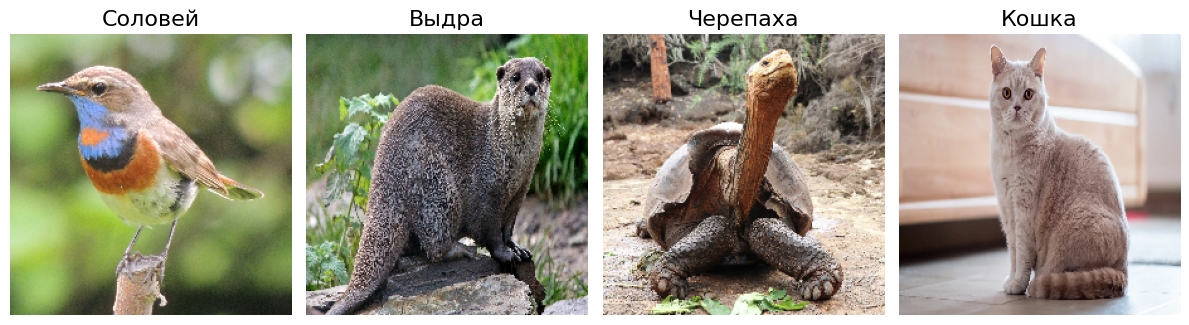

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot as plt

# Пути к изображениям и их заголовки
image_paths = ['/content/Соловей.jpg', '/content/Выдра.jpg', '/content/Черепаха.jpg', '/content/Кошка.jpg']
image_titles = ['Соловей', 'Выдра', 'Черепаха', 'Кошка']

# Загрузка изображений с помощью цикла
images = []
for path in image_paths:
    # Загружаем изображение и изменяем его размер
    img = load_img(path, target_size=(224, 224))
    # Преобразуем изображение в массив NumPy и добавляем в список
    images.append(np.array(img))

# Преобразуем список изображений в массив NumPy
images = np.asarray(images)

# Предварительная обработка изображений для VGG16
X = preprocess_input(images)

# Отображение изображений
fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4))
for ax, img, title in zip(axes, images, image_titles):
    # Отображаем изображение на соответствующем subplot
    ax.imshow(img)
    # Устанавливаем заголовок subplot
    ax.set_title(title, fontsize=16)
    # Скрываем оси subplot
    ax.axis('off')

# Настраиваем расположение subplot
plt.tight_layout()
# Отображаем график
plt.show()

In [ ]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

# Создаем экземпляр класса ReplaceToLinear для замены активации на линейную
replace2linear = ReplaceToLinear()

# Определяем функцию-модификатор модели
def model_modifier_function(cloned_model):
    # Заменяем активационную функцию последнего слоя на линейную
    cloned_model.layers[-1].activation = tf.keras.activations.linear

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore

# Создаем экземпляр класса CategoricalScore с указанием интересующих нас категорий
score = CategoricalScore([285, 277, 330, 675])

# Определяем функцию, которая будет возвращать значения для выбранных категорий
def score_function(output):
    # Переменная `output` ссылается на выходы модели,
    # Возвращаем значения для категорий 285, 277, 330, 675 соответственно
    return (output[0][285], output[1][277], output[2][330], output[3][675])

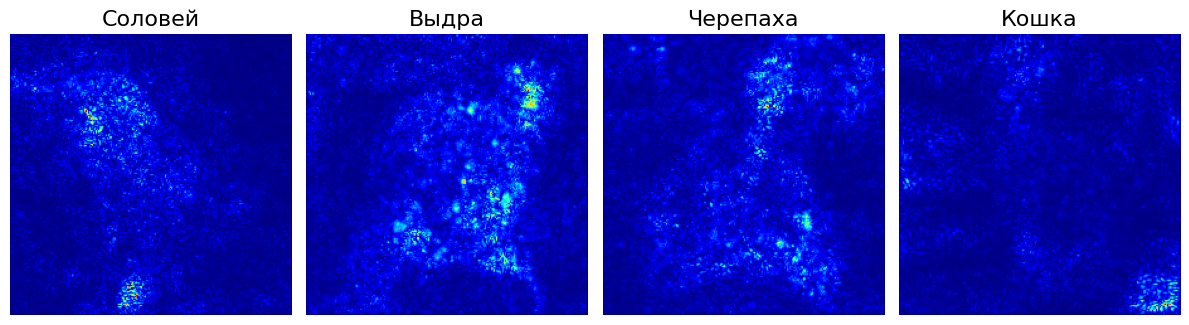

CPU times: user 4.21 s, sys: 987 ms, total: 5.2 s
Wall time: 6.53 s


In [ ]:
%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency

# Создаем экземпляр класса Saliency для генерации карты значимости
saliency = Saliency(vgg_model,
                    model_modifier=replace2linear,
                    clone=True)

# Генерация карты значимости (карты внимания)
saliency_map = saliency(score, X)

# Вывод карты значимости для каждого изображения
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)  # Устанавливаем заголовок для каждого изображения
    ax[i].imshow(saliency_map[i], cmap='jet')  # Отображаем карту значимости с цветовой схемой 'jet'
    ax[i].axis('off')  # Скрываем оси
plt.tight_layout()  # Настраиваем расположение подграфиков
plt.show()  # Отображаем график

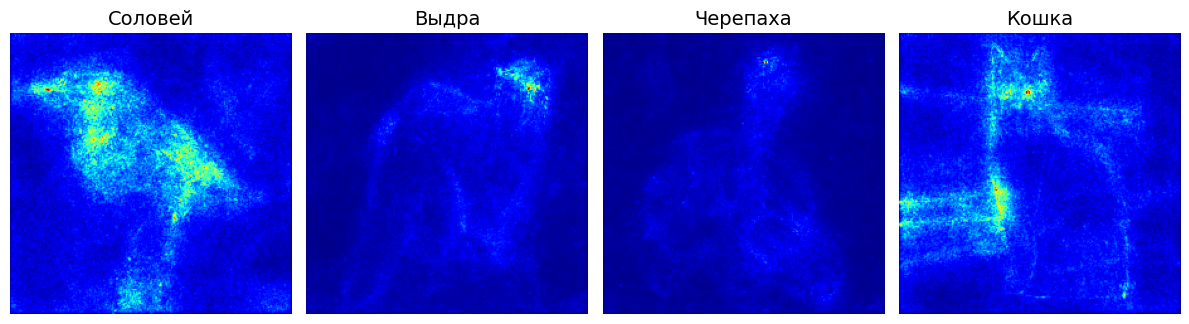

CPU times: user 3.37 s, sys: 927 ms, total: 4.29 s
Wall time: 5.04 s


In [ ]:
%%time
from tf_keras_vis.saliency import Saliency

# Инициализируем Saliency
saliency = Saliency(vgg_model,
                    model_modifier=replace2linear,
                    clone=True)

# Настраиваем параметры сглаживания
smooth_samples = 20  # Количество образцов для сглаживания
smooth_noise = 0.20  # Уровень шума для сглаживания

# Генерируем карту значимости со сглаживанием
saliency_map = saliency(score, X,
                        smooth_samples=smooth_samples,
                        smooth_noise=smooth_noise)

# Визуализируем результаты
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for i, ax in enumerate(axes):
    ax.set_title(image_titles[i], fontsize=14)  # Заголовок изображения
    ax.imshow(saliency_map[i], cmap='jet')  # Карта значимости
    ax.axis('off')  # Скрываем оси

plt.tight_layout()  # Оптимизируем расположение подграфиков
plt.savefig('smoothgrad.png')  # Сохраняем изображение
plt.show()  # Отображаем график

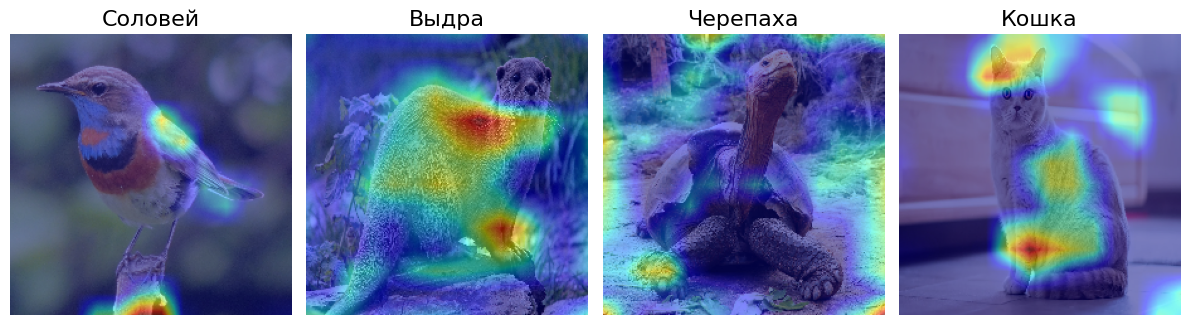

CPU times: user 1.34 s, sys: 811 ms, total: 2.16 s
Wall time: 2.07 s


In [ ]:
%%time
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Создаём объект визуализации Gradcam
gradcam = Gradcam(vgg_model,
                  model_modifier=replace2linear,
                  clone=True)

# Генерируем тепловую карту Gradcam
cam = gradcam(score,
              X,
              penultimate_layer=-1)

# Визуализируем результаты
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for i, ax in enumerate(axes):
    # Генерируем тепловую карту и накладываем её на изображение
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)  # Используем [..., :3] для RGB
    ax.set_title(image_titles[i], fontsize=16)
    ax.imshow(images[i])
    ax.imshow(heatmap, cmap='jet', alpha=0.5)
    ax.axis('off')

plt.tight_layout()  # Оптимизируем расположение подграфиков
plt.show()  # Отображаем график

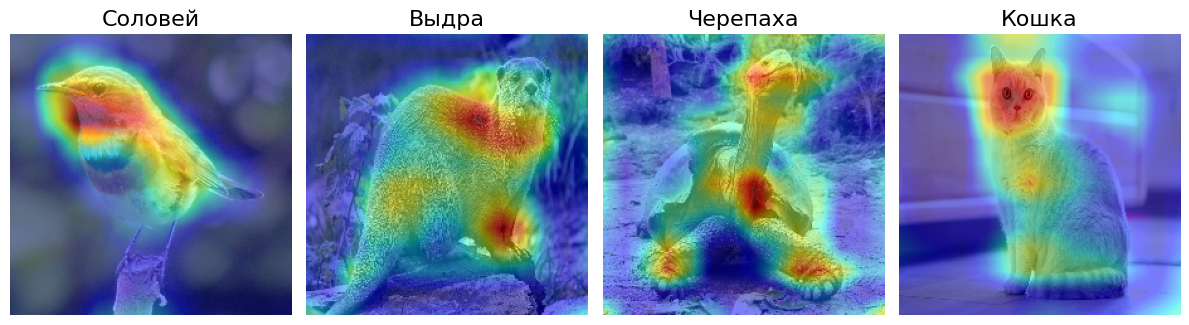

CPU times: user 1.91 s, sys: 790 ms, total: 2.7 s
Wall time: 2.64 s


In [ ]:
%%time
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from matplotlib import cm

# Создаём объект визуализации Gradcam++
gradcam_plus_plus = GradcamPlusPlus(vgg_model,
                                    model_modifier=replace2linear,
                                    clone=True)

# Генерируем тепловую карту Gradcam++
cam = gradcam_plus_plus(score,
                        X,
                        penultimate_layer=-1)

# Визуализируем результаты
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for i, ax in enumerate(axes):
    # Генерируем тепловую карту и накладываем её на изображение
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)  # Используем [..., :3] для RGB
    ax.set_title(image_titles[i], fontsize=16)
    ax.imshow(images[i])
    ax.imshow(heatmap, cmap='jet', alpha=0.5)
    ax.axis('off')

plt.tight_layout()  # Оптимизируем расположение подграфиков
plt.savefig('gradcam_plus_plus.png')  # Сохраняем изображение
plt.show()  # Отображаем график

Вывод:

Работа демонстрирует применение методов интерпретации нейронных сетей для анализа работы модели VGG16 на примере классификации изображений.
Визуализация карт внимания и тепловых карт позволяет понять, какие участки изображения являются наиболее значимыми для модели при классификации. Saliency Map выделяет области, на которые модель обращает наибольшее внимание. Grad-CAM и Grad-CAM++ показывают, какие области изображения активируют определенные фильтры в нейронной сети, позволяя глубже понять процесс принятия решений моделью.

